Задание 6. Метод Якоби

In [154]:
!pip3 install numpy
!pip3 install scipy
!pip3 install matplotlib

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

Вычисление радиуса

In [156]:
def gershgorin_radius(a, i):
    return sum(abs(a[i][j]) for j in range(len(a)) if j != i)

Функции для выбора элемента

In [157]:
def choose_max_nondiag(a):
    assert len(a) != 1, "Матрица 1х1 :("
    el_i, el_j = 0, 0
    max_el = -1
    for i in range(len(a)):
        for j in range(len(a)):
            if i != j and max_el < abs(a[i][j]):
                max_el = abs(a[i][j])
                el_i, el_j = i, j
    return el_i, el_j

def choose_max_with_max_radius(a):
    assert len(a) != 1, "Матрица 1х1 :("
    el_i, el_j = 0, 0
    max_rad = -1
    max_el = -1
    for i in range(len(a)):
        rad = gershgorin_radius(a, i)
        if rad > max_rad:
            for j in range(len(a)):
                if i != j and max_el < abs(a[i][j]):
                    max_el = abs(a[i][j])
                    el_i, el_j = i, j
    return el_i, el_j

Вычисление матрицы вращения

In [158]:
def rotation_matrix(a, i, j):
    x = -2 * a[i][j]
    y = a[i][i] - a[j][j]
    if np.isclose(y, 0):
        c = s = 1 / np.sqrt(2)
    else:
        c = np.sqrt(0.5 * (1 + abs(y) / np.sqrt(x * x + y * y)))
        s = np.sign(x * y) * abs(x) / (2 * c * np.sqrt(x * x + y * y))
    t = np.eye(len(a))
    t[i][i] = c
    t[j][j] = c
    t[i][j] = -s
    t[j][i] = s
    return t

Метод Якоби

In [159]:
def jacobi(a, choose, eps = 1e-5, max_iter = 1000):
    assert len(a) != 0, "Пустая матрица"
    assert np.allclose(a, a.T), "Матрица должна быть эрмитовой"
    iter = 0
    for iter in range(max_iter):
        if all(gershgorin_radius(a, i) < eps for i in range(len(a))):
            break
        i, j = choose(a)
        assert i != j, "Неправильно выбран опорный элемент"
        t = rotation_matrix(a, i, j)
        a = np.matmul(np.matmul(t, a), t.T)
    eigenvalues = [a[i][i] for i in range(len(a))]
    return eigenvalues, iter

Применение метода Якоби

In [160]:
a = np.array([
    [1., 2., 3., 4., 5.],
    [2., 6., 7., 8., 9.],
    [3., 7., 0., 1., 2.],
    [4., 8., 1., 3., 4.],
    [5., 9., 2., 4., 5.]
])
res = jacobi(a, choose_max_nondiag)
print("Метод Якоби: {} (количество итераций: {})".format(res[0], res[1]))
print("Библиотечная реализация:", np.linalg.eigvals(a))

Метод Якоби: [-0.6343539643290171, 23.073370988300415, 1.04552092195645, 0.18098436637742105, -8.665522312305288] (количество итераций: 26)
Библиотечная реализация: [23.07337099 -8.66552231 -0.63435396  1.04552092  0.18098437]


Проверка собственных чисел по теореме Гершгорина

In [161]:
radii = [gershgorin_radius(a, i) for i in range(len(a))]
diag_els = [a[i][i] for i in range(len(a))]
eigs = res[0]
for val in range(len(eigs)):
    val_in_region = False
    for i in range(len(diag_els)):
        val_in_region |= val < diag_els[i] + radii[i] and val > diag_els[i] - radii[i]
    assert val_in_region, "Круги пересекаются!"
print("Все собственные числа лежат в кругах")

Все собственные числа лежат в кругах


Зависимость количества итераций от Eps (выбор максимального элемента)

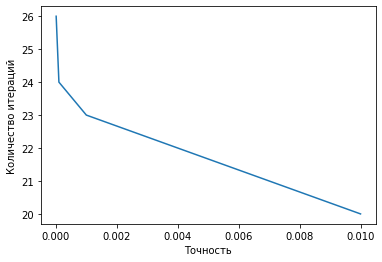

In [162]:
yaxis = []
xaxis = []
eps = 1e-2
for i in range(4):
    yaxis.append(jacobi(a, choose_max_nondiag, eps)[1])
    xaxis.append(eps)
    eps /= 10
plt.plot(xaxis, yaxis)
plt.xlabel("Точность")
plt.ylabel("Количество итераций")
plt.show()

Зависимость количества итераций от Eps (выбор максимального элемента из строки, представляющей максимальный радиус)

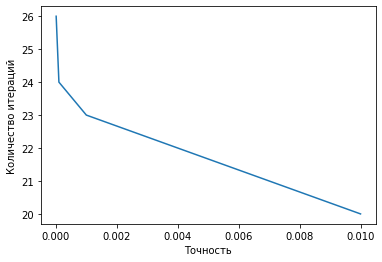

In [163]:
yaxis = []
xaxis = []
eps = 1e-2
for i in range(4):
    yaxis.append(jacobi(a, choose_max_with_max_radius, eps)[1])
    xaxis.append(eps)
    eps /= 10
plt.plot(xaxis, yaxis)
plt.xlabel("Точность")
plt.ylabel("Количество итераций")
plt.show()

Тест на матрице Гильберта порядка 6

In [164]:
h = hilbert(6)
res1 = jacobi(h, choose_max_nondiag, 1e-10)
res2 = jacobi(h, choose_max_with_max_radius, 1e-10)
print("Метод Якоби с выбором максимального элемента:\n\t{} (количество итераций: {})".format(res1[0], res1[1]))
print("Метод Якоби с выбором максимального элемента из строки, представляющей максимальный радиус:\n\t{} (количество итераций: {})".format(res2[0], res2[1]))
print("Библиотечная реализация:", np.linalg.eigvals(h))

Метод Якоби с выбором максимального элемента:
	[1.6188998589243389, 0.2423608705752094, 0.0006157483541826388, 1.2570757122655137e-05, 1.082799484522521e-07, 0.01632152131987583] (количество итераций: 46)
Метод Якоби с выбором максимального элемента из строки, представляющей максимальный радиус:
	[1.6188998589243389, 0.2423608705752094, 0.0006157483541826388, 1.2570757122655137e-05, 1.082799484522521e-07, 0.01632152131987583] (количество итераций: 46)
Библиотечная реализация: [1.61889986e+00 2.42360871e-01 1.63215213e-02 6.15748354e-04
 1.25707571e-05 1.08279948e-07]
